<a href="https://colab.research.google.com/github/PavanReddy28/CRuX/blob/main/TimeSeriesForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Time Series Forecasting using ARIMA

**ARIMA** Model is a popular and widely used statistic model for time series analysis and forecasting. 

ARIMA stand for "Auto-Regressive Integrated Moving Average".

This model aims to find the auto-correlation in the data.

**Dataset**

Used  "New York Stock Exchange" dataset on S&P 500 companies historical prices with fundamental data (https://www.kaggle.com/dgawlik/nyse).

I used the data of one company (with code 'WU') from the 'prices-split-adjusted.csv' file, to do forecasting using ARIMA model.

**WorkFlow of Forecasting**
1. Visualize the Time Series Data
2. Identify if the date is stationary
3. Plot the Correlation and Auto Correlation Charts
4. Construct the ARIMA Model

### Packages

In [ ]:
from datetime import datetime
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### Importing Time Series Data

Used part of the "New York Stock Exchange" dataset on S&P 500 companies historical prices with fundamental data (https://www.kaggle.com/dgawlik/nyse).

I will be predicting the closing value of one company (with code 'WU').

In [ ]:
datetime.strptime('2013-01-01 09:10:12', '%Y-%m-%d %H:%M:%S')

datetime.datetime(2013, 1, 1, 9, 10, 12)

In [ ]:
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

In [ ]:
print(parser('3-01'))

1903-01-01 00:00:00


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
tsd = pd.read_csv('/gdrive/My Drive/Inductions/nyse_stock_data.csv')

In [ ]:
tsd.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [ ]:
tsd['symbol'].value_counts()

HD      1762
UHS     1762
MCHP    1762
CELG    1762
ADM     1762
        ... 
PYPL     378
HPE      304
CSRA     284
WLTW     251
FTV      126
Name: symbol, Length: 501, dtype: int64

In [ ]:
tsd = tsd[tsd['symbol']=='WU']

In [ ]:
tsd.head()

,date,symbol,open,close,low,high,volume
702,2010-01-04,WU,19.100000,19.090000,19.049999,19.240000,4277900.0
1170,2010-01-05,WU,19.150000,19.010000,18.770000,19.150000,3914900.0
1638,2010-01-06,WU,18.889999,19.000000,18.870001,19.049999,4207900.0
2106,2010-01-07,WU,18.920000,19.610001,18.850000,19.730000,8256900.0
2574,2010-01-08,WU,19.600000,19.799999,19.459999,19.809999,5673900.0


In [ ]:
tsd.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21',
               '2016-12-22', '2016-12-23', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', name='date', length=1762, freq=None)

In [ ]:
tsd.set_index('date', inplace=True)

In [ ]:
tsd['date'] = pd.to_datetime(tsd['date'], format="%Y/%m/%d")

In [ ]:
tsd.drop(['symbol', 'open', 'low', 'high', 'volume'], axis=1, inplace=True)

In [ ]:
tsd.head()

,close
date,
2010-01-04,19.090000
2010-01-05,19.010000
2010-01-06,19.000000
2010-01-07,19.610001
2010-01-08,19.799999


In [ ]:
ts_final = pd.Series(tsd['close'])

In [ ]:
ts_final

date
2010-01-04    19.090000
2010-01-05    19.010000
2010-01-06    19.000000
2010-01-07    19.610001
2010-01-08    19.799999
                ...    
2016-12-23    21.850000
2016-12-27    22.030001
2016-12-28    21.730000
2016-12-29    21.830000
2016-12-30    21.719999
Name: close, Length: 1762, dtype: float64

### Visualizing Time Series Data

In [ ]:
tsd.head()

,close
date,
2010-01-04,19.090000
2010-01-05,19.010000
2010-01-06,19.000000
2010-01-07,19.610001
2010-01-08,19.799999


As we can see below, other than the otulier in 2012, there seems to be a seasonal behaviour. 

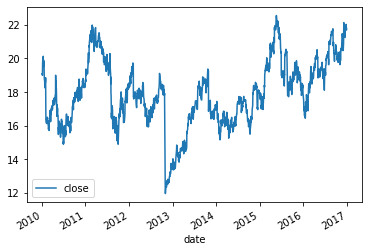

In [ ]:
tsd.plot()

In [ ]:
ts_final.head()

date
2010-01-04    19.090000
2010-01-05    19.010000
2010-01-06    19.000000
2010-01-07    19.610001
2010-01-08    19.799999
Name: close, dtype: float64

In [ ]:
ts_final.mean()

17.891827460839966

### Stationarity

A stationary time series data is one whose properties do not depend on the time, that is why time series with trends, or with seasonality, are not stationary.

Time series is considered to be stationary if it has constant statistical properties over time, ie. the following:
1. Constant mean
2. Constant variance
3. An Autocovariance that does not depend on time.

There are 2 major reasons behind non-stationaruty of a TS:

1. Trend – varying mean over time. For eg, in this case we saw that on average, the number of passengers was growing over time.
2. Seasonality – variations at specific time-frames. eg people might have a tendency to buy cars in a particular month because of pay increment or festivals. 

Stationary datasets are those that have a stable mean and variance, and are in turn much easier to model.Therfore, for using the ARIMA model we need stationary Time Series data.

I used the **Dickey-Fullers Test** to check for stationarity, in which we check whether the test statistic calculated, is less than the critical values of some  confidence intervals.

In [ ]:
def check_stationarity(tsd):

  roll_mean = tsd.rolling(30).mean()
  roll_std = tsd.rolling(5).std()

  fig = plt.figure(figsize=(20,10))

  plt.subplot(211)

  plt.plot(tsd, label='original', color='blue')
  plt.plot(roll_mean, label='Rolling Mean', color = 'red')
  plt.legend()

  plt.subplot(212)

  plt.plot(roll_std, label='Rolling Std Dev', color='green')
  plt.legend()

  print('Dickey-Fuller test results\n')

  df_test = adfuller(tsd, regresults=False)
  test_result = pd.Series(df_test[0:4], index=['Test Statistic','p-value','# of lags','# of obs'])
  print(test_result)
  for k,v in df_test[4].items():
      print('Critical value at %s: %1.5f' %(k,v))



As we can obeserve the variations in the mean over time and how there seems to be a seasonal pattern (other than the outlier in 2012).

Further, the results of Dickey Fuller test show that the test statistic is not smaller than the critical value of the conffidence intervals. Thus, the given data is not Stationary.

First, lets try taking the log transform and then find the first log difference.

Dickey-Fuller test results

Test Statistic      -2.905708
p-value              0.044688
# of lags            0.000000
# of obs          1761.000000
dtype: float64
Critical value at 1%: -3.43407
Critical value at 5%: -2.86318
Critical value at 10%: -2.56764


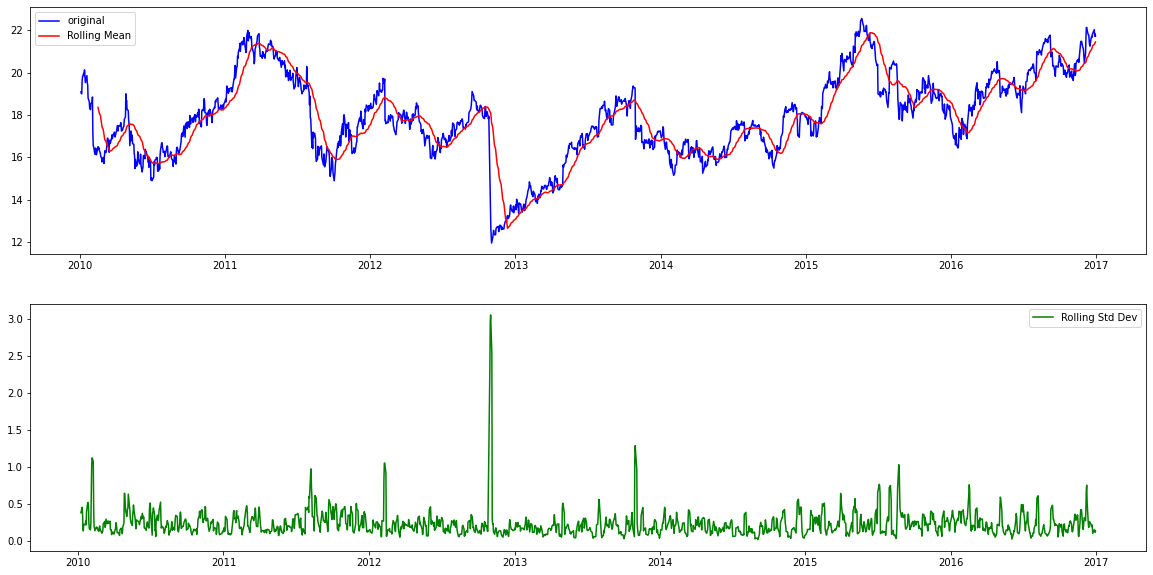

In [ ]:
check_stationarity(ts_final)

In [ ]:
ts_final_log = np.log(ts_final)

In [ ]:
ts_final_log.head()

date
2010-01-04    2.949165
2010-01-05    2.944965
2010-01-06    2.944439
2010-01-07    2.976040
2010-01-08    2.985682
Name: close, dtype: float64

As we can see below, in the results of Dickey Fuller test on the log transformed data, the test statistic is still larger than the critical values. Thus, the time seires is not stationary.

Now, lets try to take the first log difference of the time series data in order to make the time series data stationary.

Dickey-Fuller test results

Test Statistic      -3.007091
p-value              0.034238
# of lags            0.000000
# of obs          1761.000000
dtype: float64
Critical value at 1%: -3.43407
Critical value at 5%: -2.86318
Critical value at 10%: -2.56764


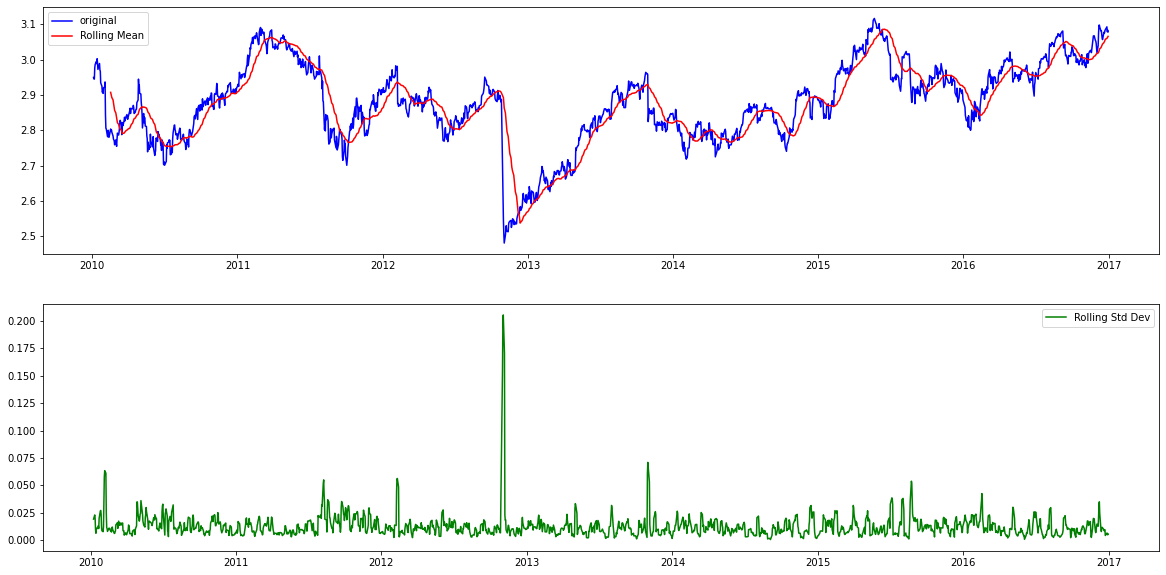

In [ ]:
check_stationarity(ts_final_log)

In [ ]:
ts_log_diff = ts_final_log -ts_final_log.shift()

In [ ]:
ts_log_diff.dropna(inplace=True)

#### Log Transform

For forecasting and economic analysis many variables are used in logarithms (logs). In time series analysis this transformation is often considered to stabilize the variance of a series.

The results of Dickey Fuller test of first log difference of the data show that, the test statistic is smaller than the critical values. Thus, it is stationary.

Now, lets try using the original data.

Dickey-Fuller test results

Test Statistic     -42.968416
p-value              0.000000
# of lags            0.000000
# of obs          1760.000000
dtype: float64
Critical value at 1%: -3.43407
Critical value at 5%: -2.86318
Critical value at 10%: -2.56764


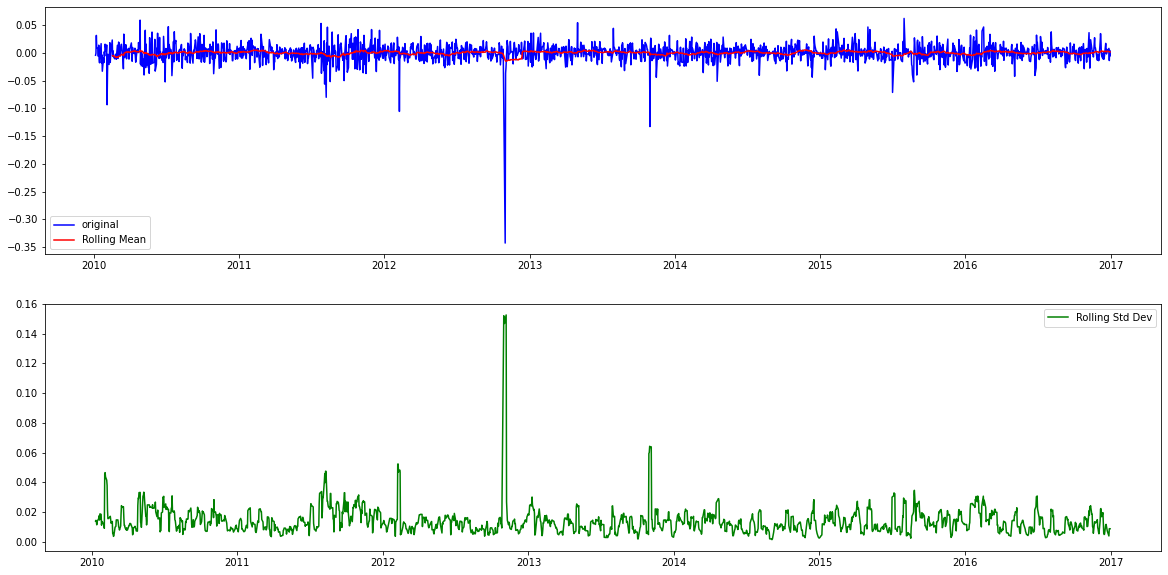

In [ ]:
check_stationarity(ts_log_diff)

In [ ]:
ts_final_diff = ts_final - ts_final.shift()

In [ ]:
ts_final_diff.dropna(inplace=True)

#### Differencing

**Lag Difference**

Taking the difference between consecutive observations is called a lag-1 difference.

**Difference Order**

The process of differencing can be repeated more than once until all temporal dependency has been removed.

The number of times that differencing is performed is called the difference order.

Here, we are taking the difference order as '1', and by doing so, we can see that the average is almost constant now.

Also, the results of Dickey Fuller test shows that the test statistic is smaller than the critical values. Thus, it is stationary.

Dickey-Fuller test results

Test Statistic     -43.309486
p-value              0.000000
# of lags            0.000000
# of obs          1760.000000
dtype: float64
Critical value at 1%: -3.43407
Critical value at 5%: -2.86318
Critical value at 10%: -2.56764


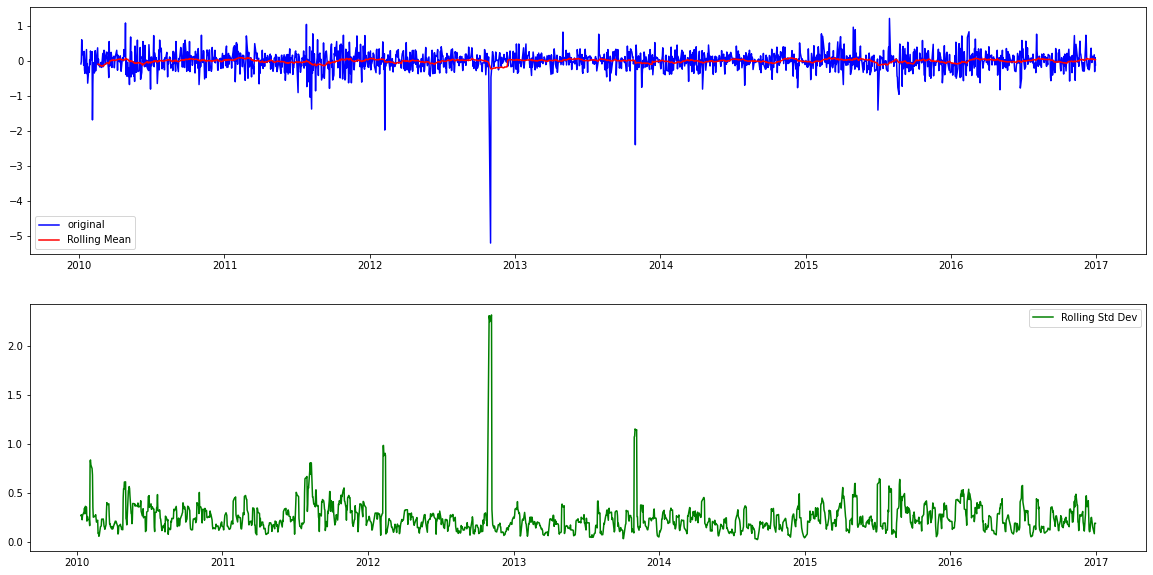

In [ ]:
check_stationarity(ts_final_diff)

### Auto Correlation Plots

Plotting the autocorrelation plots to decide on the p and q values in the ARIMA Model.

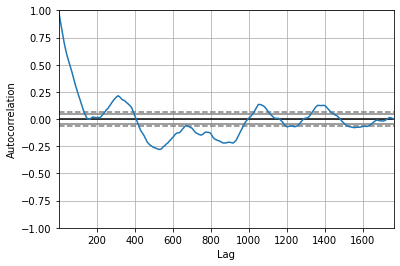

In [ ]:
autocorrelation_plot(ts_final)

The **Autocorrelation function** plot will let you know how the given time series is correlated with itself.

The **partial autocorrelation** at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.

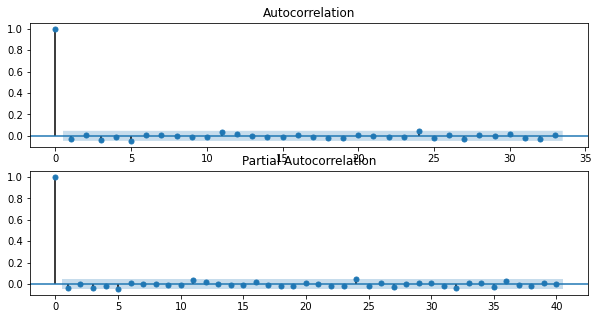

In [ ]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_final_diff,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_final_diff,lags=40,ax=ax2)

Form the above plots:
1. p – The lag value where the PCAF plot crosses the upper confidence interval for the first time. If you notice closely, in this case p=1.
2. q – The lag value where the ACF plot crosses the upper confidence interval for the first time. If you notice closely, in this case q=1.

Note: Above terms  explained below.

### ARIMA Model

ARIMA stands for Auto Regressive Integrated Moving Average.

The full model can be written as

$$y_t = c + ϕ_1.y'_{t-1} + ... + ϕ_p.y'_{t-p} + θ_1.ε_{t−1} + ... + θ_q.ε_{t-q} + ε_t$$

, where y'_t is the differenced series (it may have been differenced more than once). The “predictors” on the right hand side include both lagged values of  
y_t and lagged errors. We call this an ARIMA(p,q,d) model.

The predictors depend on the parameters (p,d,q) of the ARIMA model:

1. **p - order of the autoregressive part** : AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5)

2. **q - order of the moving part** : MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.

3. **d - degree of first differencing involved** : These are the number of nonseasonal differences, i.e. in this case we took the first order difference. I have already taken the first order difference earlier, so **I will be taking d as '0'**.

In [ ]:
arima = ARIMA(ts_final_diff, order=(1,1,0))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
arima_model = arima.fit(full_output=True)

In [ ]:
help(arima_model)

In [ ]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 1760
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -741.179
Method:                       css-mle   S.D. of innovations              0.369
Date:                Wed, 10 Feb 2021   AIC                           1488.359
Time:                        07:56:46   BIC                           1504.778
Sample:                             1   HQIC                          1494.427
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.007e-05      0.006      0.002      0.999      -0.011       0.011
ar.L1.D.close    -0.5172      0.020    -25.365      0.000      -0.557      -0.477
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.9336           +0.0000j            1.9336            0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
predictions = arima.predict(arima_model.params, start=1760, end=1769)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


Below graph shows the values the model predicts along with the original values between 2016-10-01 and 201-01-01.

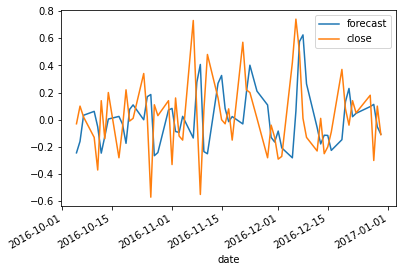

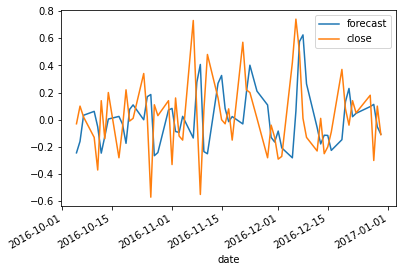

In [ ]:
arima_model.plot_predict(start=1700, end=1760)

In [ ]:
predictions

array([-0.20685542,  0.10862264, -0.05616168,  0.02906072, -0.01501421,
        0.00778026, -0.00400848,  0.00208837, -0.00106477,  0.00056595])

In [ ]:
arima_model.predict(start=1760, end=1769)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


1759   -0.206855
1760    0.108623
1761   -0.056162
1762    0.029061
1763   -0.015014
1764    0.007780
1765   -0.004008
1766    0.002088
1767   -0.001065
1768    0.000566
dtype: float64

### Reverting back to original units

In [ ]:
predicted = pd.Series(arima_model.fittedvalues, copy=True)
predicted

date
2010-01-06    0.000010
2010-01-07   -0.036187
2010-01-08   -0.320634
2010-01-11    0.217231
2010-01-12    0.010358
                ...   
2016-12-23   -0.093076
2016-12-27    0.046560
2016-12-28   -0.067218
2016-12-29    0.248261
2016-12-30   -0.206855
Length: 1760, dtype: float64

In [ ]:
ts_final_cumsum = predicted.cumsum()
ts_final_cumsum

date
2010-01-06    0.000010
2010-01-07   -0.036177
2010-01-08   -0.356811
2010-01-11   -0.139580
2010-01-12   -0.129223
                ...   
2016-12-23   -0.086957
2016-12-27   -0.040397
2016-12-28   -0.107614
2016-12-29    0.140646
2016-12-30   -0.066209
Length: 1760, dtype: float64

In [ ]:
ts_final_pred = ts_final.add(ts_final_cumsum, fill_value=0)
#ts_final_pred.head()
ts_final_pred.tail()

date
2016-12-23    21.763043
2016-12-27    21.989604
2016-12-28    21.622386
2016-12-29    21.970646
2016-12-30    21.653790
dtype: float64

Plot of the original and forecast values.

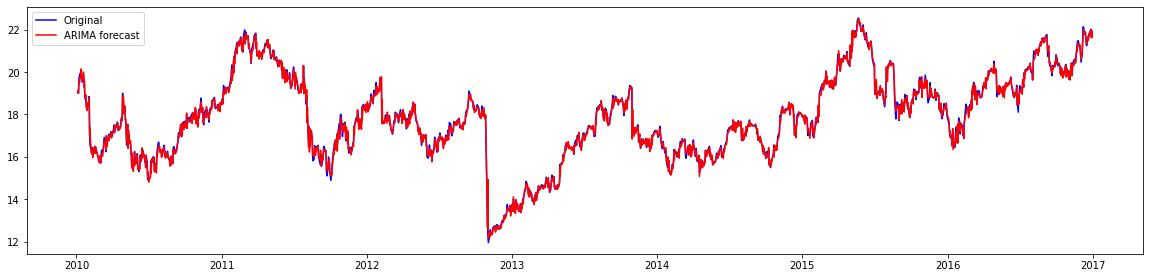

In [ ]:
fig = plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(ts_final, label='Original', color='blue')
plt.plot(ts_final_pred, label='ARIMA forecast', color='red')
plt.legend()

### Forecasting

In [ ]:
final_pred = []
pd.Series(final_pred)
for i in predictions:
    t = ts_final[-1] + i
    final_pred.index()
    final_pred.append(t)

Forecasting for closing values of the 'WU' company, for the first 9 days of 2017, using the data from 2010-2016.

In [ ]:
final_pred = pd.Series(final_pred)
final_pred

0    21.513144
1    21.828622
2    21.663837
3    21.749060
4    21.704985
5    21.727779
6    21.715991
7    21.722087
8    21.718934
9    21.720565
dtype: float64

### Resources Used

1. Dataset - https://www.kaggle.com/dgawlik/nyse
2. Basics of Time Series Analysis Techniques like Differencing and decomposition - https://machinelearningmastery.com/remove-trends-seasonality-difference-transform-python/
3. ARIMA Model - https://www.analyticsvidhya.com/blog/2020/10/how-to-create-an-arima-model-for-time-series-forecasting-in-python/

**Future Scope**:
Trying out SARIMA model and wokring with larger data.
